In [2]:
# Read in document-term matrix
import pandas as pd

data = pd.read_pickle("dtm.pkl")
data = data.transpose()
data

,speaker1 _a.txt,speaker1_b.txt,speaker1_c.txt,speaker1_d.txt,speaker2_a.txt,speaker2_b.txt,speaker2_c.txt,speaker2_d.txt
10,0,0,0,0,2,0,0,0
100,0,1,0,0,0,0,0,0
12,0,0,0,2,1,0,0,0
12020,0,0,1,0,0,0,0,0
13,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
youtube,0,0,1,0,0,0,0,0
youve,0,0,7,0,1,0,0,0
zeitgeist,0,0,2,0,0,0,0,0
zoom,0,1,0,0,0,0,0,0


In [3]:
# find top 10 words said by each transcript
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(10)
    top_dict[c] = list(zip(top.index, top.values))    
top_dict

{'speaker1 _a.txt': [('netflix', 5),
  ('play', 4),
  ('actually', 3),
  ('going', 3),
  ('sort', 2),
  ('stock', 2),
  ('im', 2),
  ('question', 2),
  ('disney', 2),
  ('guess', 2)],
 'speaker1_b.txt': [('netflix', 15),
  ('think', 10),
  ('going', 8),
  ('lot', 6),
  ('growth', 5),
  ('theres', 5),
  ('dont', 5),
  ('content', 4),
  ('cheaper', 4),
  ('price', 4)],
 'speaker1_c.txt': [('know', 95),
  ('just', 47),
  ('really', 44),
  ('think', 35),
  ('like', 29),
  ('weve', 25),
  ('things', 23),
  ('people', 20),
  ('going', 20),
  ('great', 19)],
 'speaker1_d.txt': [('big', 4),
  ('netflix', 4),
  ('new', 4),
  ('really', 3),
  ('subscribers', 3),
  ('viewership', 3),
  ('12', 2),
  ('wont', 2),
  ('working', 2),
  ('chart', 2)],
 'speaker2_a.txt': [('going', 14),
  ('think', 11),
  ('theyre', 10),
  ('know', 10),
  ('people', 6),
  ('netflix', 6),
  ('just', 6),
  ('billion', 5),
  ('youre', 5),
  ('content', 5)],
 'speaker2_b.txt': [('market', 5),
  ('want', 3),
  ('subscribers'

In [4]:
# print top 15 words said by each transcript
for voice, top_words in top_dict.items():
    print(voice)
    print(",  ".join([word for word, count in top_words[0:14]]))
    print("---")

speaker1 _a.txt
netflix,  play,  actually,  going,  sort,  stock,  im,  question,  disney,  guess
---
speaker1_b.txt
netflix,  think,  going,  lot,  growth,  theres,  dont,  content,  cheaper,  price
---
speaker1_c.txt
know,  just,  really,  think,  like,  weve,  things,  people,  going,  great
---
speaker1_d.txt
big,  netflix,  new,  really,  subscribers,  viewership,  12,  wont,  working,  chart
---
speaker2_a.txt
going,  think,  theyre,  know,  people,  netflix,  just,  billion,  youre,  content
---
speaker2_b.txt
market,  want,  subscribers,  mature,  really,  like,  andre,  thoughts,  domestic,  bit
---
speaker2_c.txt
zynga,  hats,  frequently,  fresh,  fun,  future,  game,  games,  gaming,  gate
---
speaker2_d.txt
growth,  netflix,  daily,  just,  snapchat,  quarter,  social,  thats,  look,  users
---


In [5]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# lets take the top 30 words for each speaker
words = []
for voice in data.columns:
    top = [word for (word, count) in top_dict[voice]]
    for t in top:
        words.append(t)
        
#words

In [6]:
# aggreagte list and identift most common words along with how many  routines they occur in
Counter(words).most_common()

[('netflix', 5),
 ('going', 4),
 ('think', 3),
 ('just', 3),
 ('really', 3),
 ('growth', 2),
 ('content', 2),
 ('know', 2),
 ('like', 2),
 ('people', 2),
 ('subscribers', 2),
 ('play', 1),
 ('actually', 1),
 ('sort', 1),
 ('stock', 1),
 ('im', 1),
 ('question', 1),
 ('disney', 1),
 ('guess', 1),
 ('lot', 1),
 ('theres', 1),
 ('dont', 1),
 ('cheaper', 1),
 ('price', 1),
 ('weve', 1),
 ('things', 1),
 ('great', 1),
 ('big', 1),
 ('new', 1),
 ('viewership', 1),
 ('12', 1),
 ('wont', 1),
 ('working', 1),
 ('chart', 1),
 ('theyre', 1),
 ('billion', 1),
 ('youre', 1),
 ('market', 1),
 ('want', 1),
 ('mature', 1),
 ('andre', 1),
 ('thoughts', 1),
 ('domestic', 1),
 ('bit', 1),
 ('zynga', 1),
 ('hats', 1),
 ('frequently', 1),
 ('fresh', 1),
 ('fun', 1),
 ('future', 1),
 ('game', 1),
 ('games', 1),
 ('gaming', 1),
 ('gate', 1),
 ('daily', 1),
 ('snapchat', 1),
 ('quarter', 1),
 ('social', 1),
 ('thats', 1),
 ('look', 1),
 ('users', 1)]

In [7]:
# if more than half of the speakers have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 1]
add_stop_words

['netflix',
 'going',
 'think',
 'just',
 'really',
 'growth',
 'content',
 'know',
 'like',
 'people',
 'subscribers']

In [15]:
# update document-term matrix with new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# read in cleaned data
data_clean = pd.read_pickle("data_df.pkl")

# add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# recreate document term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcripts)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# pickle for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))

data_stop.to_pickle("dtm_stop.pkl")
data_clean.to_pickle("data_clean.pkl")

data_stop
data_stop

,10,100,12,12020,13,20,200,2019,2020,21,...,yep,yield,york,youll,youre,youtube,youve,zeitgeist,zoom,zynga
speaker1 _a.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
speaker1_b.txt,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
speaker1_c.txt,0,0,0,1,1,2,0,1,0,2,...,2,0,0,0,4,1,7,2,0,0
speaker1_d.txt,0,0,2,0,0,0,0,0,0,0,...,0,0,1,2,0,0,0,0,0,0
speaker2_a.txt,2,0,1,0,0,2,1,0,0,0,...,0,1,0,0,5,0,1,0,0,1
speaker2_b.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
speaker2_c.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
speaker2_d.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# make the word clouds
from wordcloud import WordCloud
wc = WordCloud(stopwords=stop_words, background_color="black", colormap="Dark2", max_font_size=150, random_state=42)
wc

ValueError: We need at least 1 word to plot a word cloud, got 0.

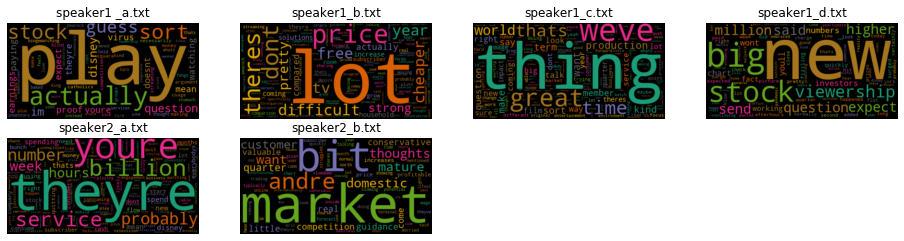

In [53]:
# reset output dimensions

# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]
text_files = ["speaker1 _a.txt","speaker1_b.txt", "speaker1_c.txt", "speaker1_d.txt", "speaker2_a.txt", "speaker2_b.txt", "speaker2_c.txt", "speaker2_d.txt" ]


# create subplotas for each voice
for index, voice in enumerate(data.columns):
   
    wc.generate(data_clean.transcripts[voice])
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(text_files[index])
    
plt.show()

"""
Note this only gave a value error because c.txt file only had one speaker
"""

In [54]:
"""
Number of words
"""

# find the number of unique words each speaker uses
# identify non zero items in document term matrix, meaning that the word occurs at least once
unique_list = []
for voice in data.columns:
    uniques = data[voice].to_numpy().nonzero()[0].size
    unique_list.append(uniques)
    
# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(text_files, unique_list)), columns=['file_names', "unique_words"])
data_unique_sort = data_words.sort_values(by="unique_words")
data_unique_sort

,file names,unique_words
6,speaker2_c.txt,0
0,speaker1 _a.txt,71
5,speaker2_b.txt,80
7,speaker2_d.txt,84
3,speaker1_d.txt,102
1,speaker1_b.txt,167
4,speaker2_a.txt,218
2,speaker1_c.txt,1123


In [60]:
# calculate words per minute for each voice
# find total number of words
# essentially the first 4 rows would represent more of the total words used in the video regarding words per minute

total_list = []
for voice in data.columns:
    totals = sum(data[voice])
    total_list.append(totals)
    
# run times, in minutes from IMDB
run_times = [2, 3, 37, 2, 0, 0, 0, 0]

# lets add columns to the dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by="words_per_minute")
data_wpm_sort

,file names,unique_words,total_words,run_times,words_per_minute
0,speaker1 _a.txt,71,88,2,44.000000
3,speaker1_d.txt,102,133,2,66.500000
2,speaker1_c.txt,1123,2827,37,76.405405
1,speaker1_b.txt,167,280,3,93.333333
4,speaker2_a.txt,218,352,0,inf
5,speaker2_b.txt,80,116,0,inf
7,speaker2_d.txt,84,98,0,inf
6,speaker2_c.txt,0,0,0,NaN


In [1]:
# lets check for specific words
Counter(words).most_common()

# isolate the words u want to seek out
data_bad_words = data.transpose()[["positive", "good", "high"]]
data_profanity = pd.concat([data_bad_words.positive + data_bad_words.good, data_bad_words.high], axis=1)
data_profanity.columns = ['positive', "good_high"]
data_profanity

NameError: name 'Counter' is not defined